# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [142]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

* Please note: the K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion. Inertia can be recognized as a measure of how internally coherent clusters are.
Source: https://scikit-learn.org/stable/modules/clustering.html

In [143]:
# X = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
kmeans.labels_
n_8 = np.unique(kmeans.labels_, return_counts=True)

print('Silhouette Score for 8 clusters:', (
    silhouette_score(X, kmeans.predict(X))))
print(n_8)

Silhouette Score for 8 clusters: 0.5398971441034137
(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([28, 17, 30,  6, 23, 34, 16, 24]))


* Also note: Inertia is the sum of the distances of all points from their cluster centers. It will always increase as the number of clusters decreases, as we can see in the next exercises.

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [144]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
kmeans.labels_
n_5 = np.unique(kmeans.labels_, return_counts=True)

print('Silhouette Score for 5 clusters:', (silhouette_score(X, kmeans.predict(X))))
print(n_5)

Silhouette Score for 5 clusters: 0.5489993239795691
(array([0, 1, 2, 3, 4], dtype=int32), array([57, 20, 26, 27, 48]))


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [145]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.labels_
n_3 = np.unique(kmeans.labels_, return_counts=True)

print('Silhouette Score for 3 clusters:', (
    silhouette_score(X, kmeans.predict(X))))
print(n_3)

Silhouette Score for 3 clusters: 0.5711381937868844
(array([0, 1, 2], dtype=int32), array([69, 47, 62]))


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

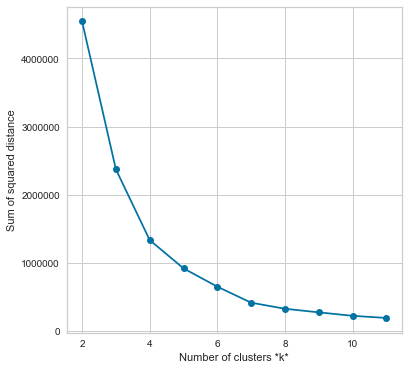

In [146]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(2, 12))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    # append the inertia: sum of squared distances of samples to their closest cluster center
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [128]:
# ! pip install yellowbrick

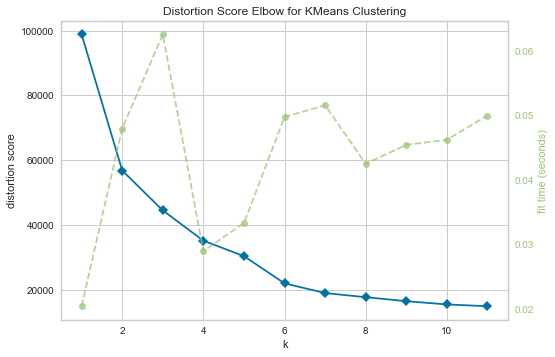

In [156]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()

visualizer = KElbowVisualizer(model, 
                              k=(1,12), 
                              metric='distortion',
                             # timings=False,
                             )
visualizer.fit(X)
# The poof() method finalizes the drawing (adding titles, axes labels, etc) and then renders the image on your behalf
visualizer.poof()

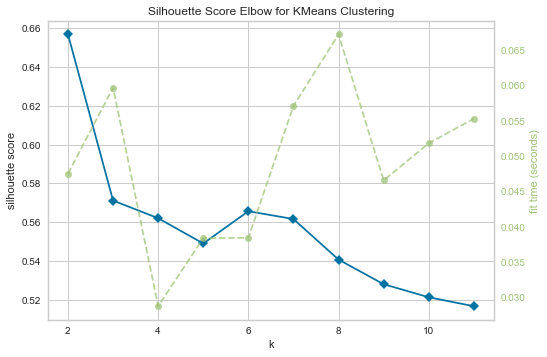

In [148]:
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette')
visualizer.fit(X)
visualizer.poof()

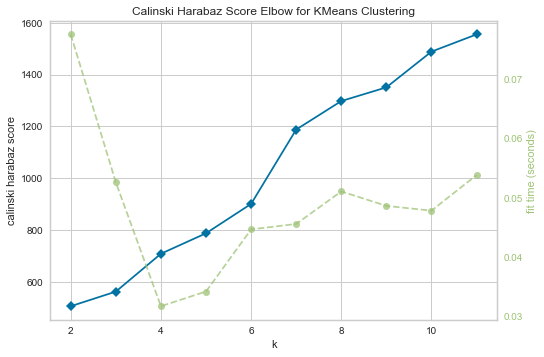

In [152]:
# 
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabaz')
visualizer.fit(X)
visualizer.poof()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

* https://medium.com/@namanbhandari/agglomerative-clustering-vs-k-means-clustering-766a90b37dc0

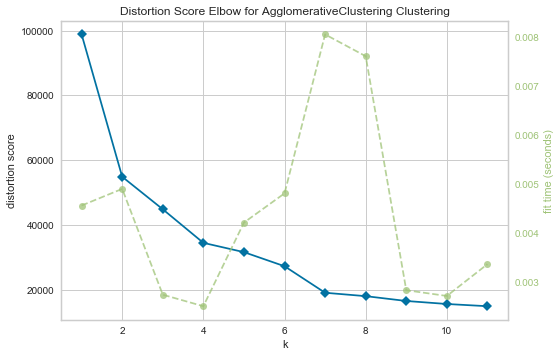

In [135]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering()

visualizer = KElbowVisualizer(model, k=(1,12), metric='distortion')
visualizer.fit(X)
visualizer.poof()

In [136]:
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette')
visualizer.fit(X)
visualizer.poof()

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

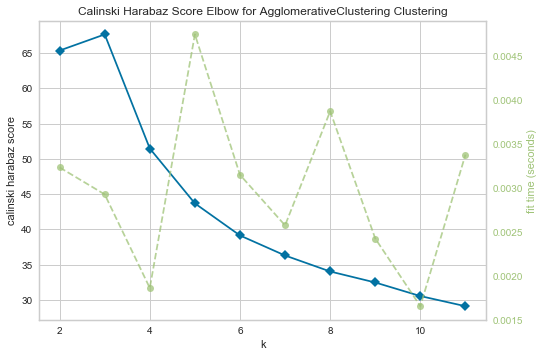

In [77]:
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabaz')
visualizer.fit(X)
visualizer.poof()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

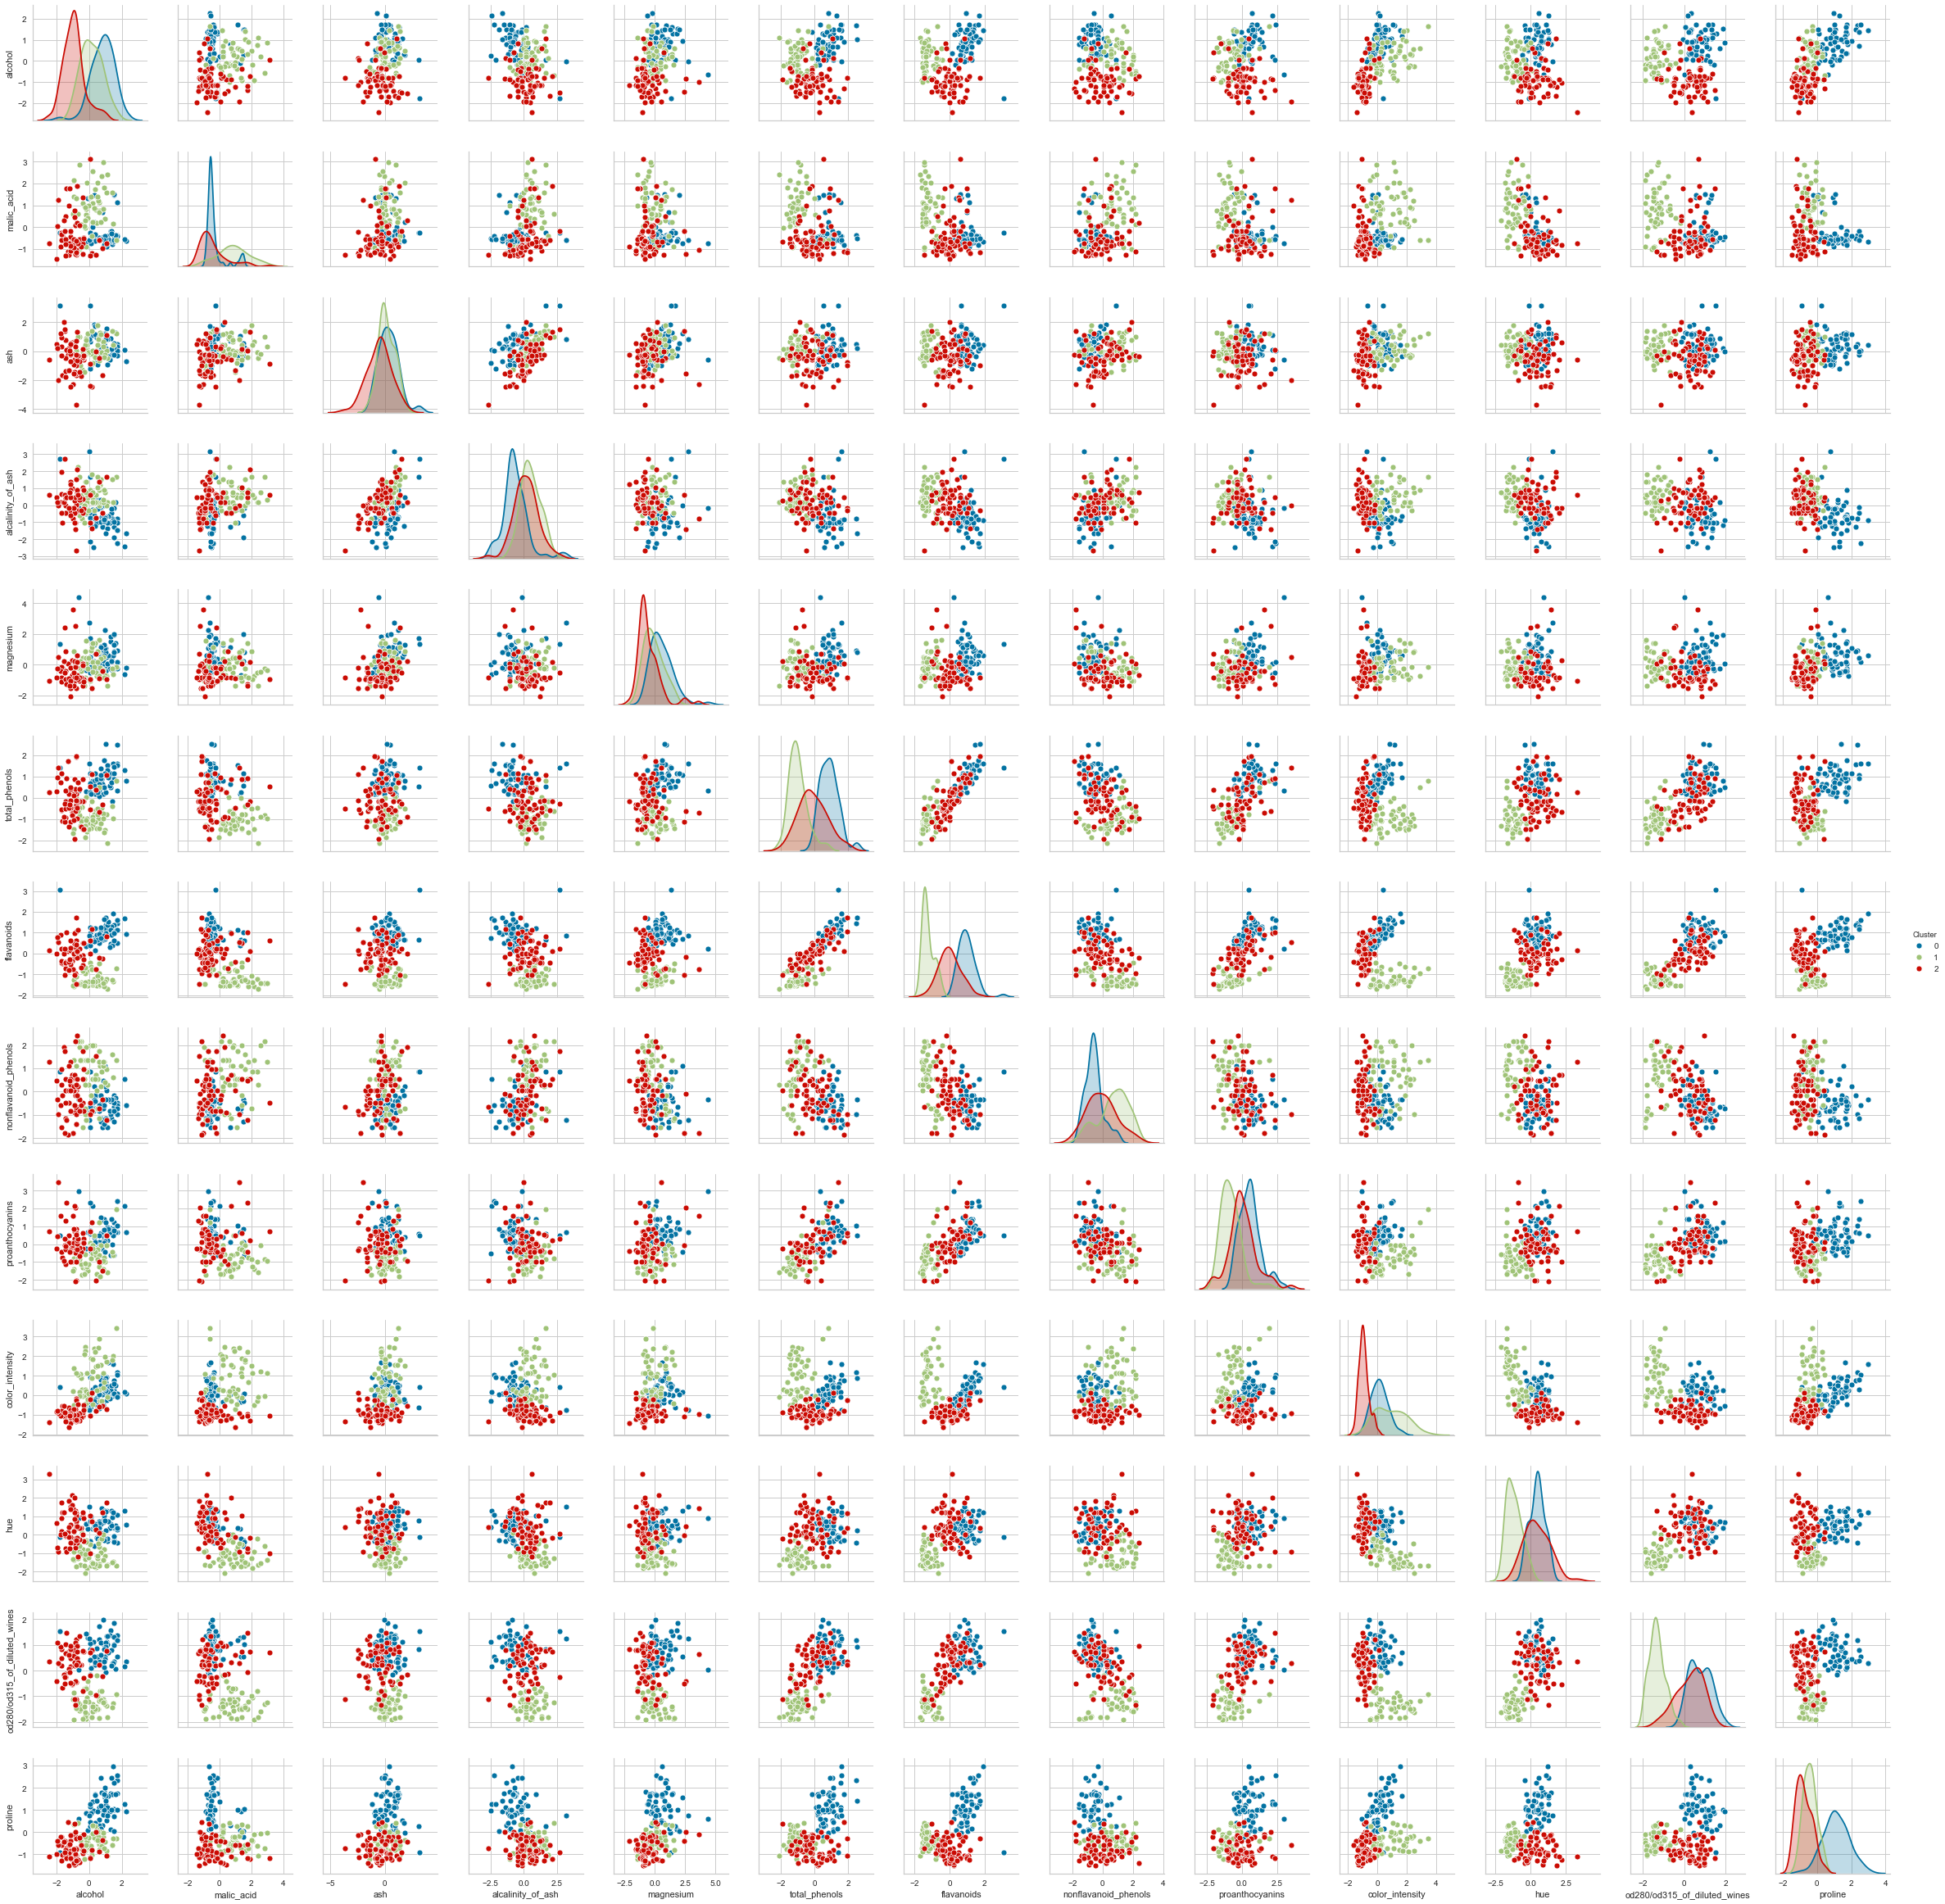

In [78]:
import seaborn as sns

df_data = pd.DataFrame(X, columns=data['feature_names'])

model = KMeans(n_clusters=3)
model.fit(X)
df_data['Cluster'] = model.predict(X)
sns.pairplot(df_data, hue='Cluster', vars=df_data.columns[:-1])

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [173]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
pca_x = pca.transform(X)

In [174]:
pca_df = pd.DataFrame([pca_x[:, 0], pca_x[:, 1]]).T

In [175]:
pc_df.head()

,pc_1,pc_2,pc_3,pc_4
0,318.562979,21.492131,3.130735,-0.250114
1,303.097420,-5.364718,6.822835,-0.864035
2,438.061133,-6.537309,-1.113223,0.912411
3,733.240139,0.192729,-0.917257,-0.541251
4,-11.571428,18.489995,-0.554422,1.360896


In [176]:
pca_df.columns = ['PC1', 'PC2']
pca_df = pd.concat([pca_df, df_data['Cluster']], axis=1)

In [178]:
pca_df.head()

,PC1,PC2,Cluster
0,318.562979,21.492131,0
1,303.097420,-5.364718,0
2,438.061133,-6.537309,0
3,733.240139,0.192729,0
4,-11.571428,18.489995,0


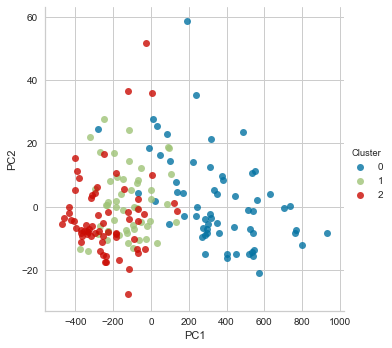

In [180]:
sns.lmplot('PC1', 'PC2', data=pca_df, hue='Cluster', fit_reg=False);

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

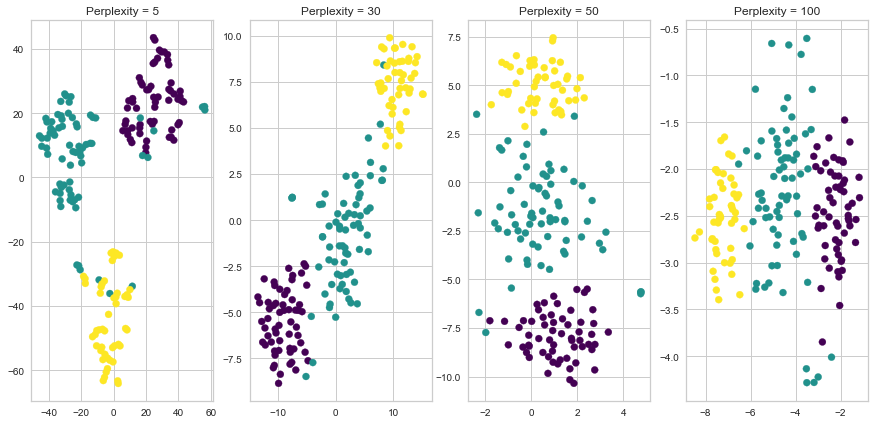

In [80]:
from sklearn.manifold import TSNE

fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=y, cmap='viridis')
    ax[i].set_title("Perplexity = {}".format(perp))

plt.show()